In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import pickle as pkl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/feature_enginering.csv')

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_to_loan,net_disposable_income
0,21.0,Female,High School,12282.0,0,Own,1000.0,Education,11.14,0.08,2.0,504,Yes,0,12.282000,12170.600
1,21.0,Female,High School,12951.0,0,Own,2500.0,Venture,7.14,0.19,2.0,532,No,1,5.180400,12772.500
2,21.0,Female,High School,12739.0,0,Own,1600.0,Venture,14.74,0.13,3.0,640,No,1,7.961875,12503.160
3,21.0,Female,Associate,13113.0,0,Own,4500.0,Homeimprovement,8.63,0.34,2.0,651,No,1,2.914000,12724.650
4,24.0,Female,Master,14283.0,1,Mortgage,1750.0,Education,10.99,0.12,2.0,679,No,1,8.161714,14090.675


In [4]:
# apply label encoder
columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
encoders = {}
for column in columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    print(f"Mapping for {column}:") 
    # mapping of the data
    for class_, index_ in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)): 
        print(f"{class_} -> {index_}")

Mapping for person_gender:
Female -> 0
Male -> 1
Mapping for person_education:
Associate -> 0
Bachelor -> 1
Doctorate -> 2
High School -> 3
Master -> 4
Mapping for person_home_ownership:
Mortgage -> 0
Other -> 1
Own -> 2
Rent -> 3
Mapping for loan_intent:
Debtconsolidation -> 0
Education -> 1
Homeimprovement -> 2
Medical -> 3
Personal -> 4
Venture -> 5
Mapping for previous_loan_defaults_on_file:
No -> 0
Yes -> 1


In [5]:
# save the encoding
with open('encoders.pkl', 'wb') as encoder_file: 
    pkl.dump(encoders, encoder_file)

In [6]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_to_loan,net_disposable_income
0,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0,12.282000,12170.600
1,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1,5.180400,12772.500
2,21.0,0,3,12739.0,0,2,1600.0,5,14.74,0.13,3.0,640,0,1,7.961875,12503.160
3,21.0,0,0,13113.0,0,2,4500.0,2,8.63,0.34,2.0,651,0,1,2.914000,12724.650
4,24.0,0,4,14283.0,1,0,1750.0,1,10.99,0.12,2.0,679,0,1,8.161714,14090.675


In [7]:
df.dtypes

person_age                        float64
person_gender                       int32
person_education                    int32
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int32
loan_amnt                         float64
loan_intent                         int32
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int32
loan_status                         int64
income_to_loan                    float64
net_disposable_income             float64
dtype: object

In [8]:
# standarization
columns = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score', 'income_to_loan', 'net_disposable_income']]
scaler = StandardScaler()
columns = scaler.fit_transform(columns)

df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score', 'income_to_loan', 'net_disposable_income']] = columns

In [9]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,income_to_loan,net_disposable_income
0,-1.381088,0,3,-1.817263,0,2,-1.523319,1,0.082231,0.08,-1.099317,-2.693926,1,0,0.073910,-1.801351
1,-1.381088,0,3,-1.796097,0,2,-1.214711,5,-1.284692,0.19,-1.099317,-2.106390,0,1,-0.614483,-1.782202
2,-1.381088,0,3,-1.802805,0,2,-1.399875,5,1.312461,0.13,-0.747643,0.159820,0,1,-0.344861,-1.790771
3,-1.381088,0,0,-1.790972,0,2,-0.803233,2,-0.775513,0.34,-1.099317,0.390638,0,1,-0.834176,-1.783725
4,-0.633256,0,4,-1.753956,1,0,-1.369015,1,0.030971,0.12,-1.099317,0.978174,0,1,-0.325489,-1.740267


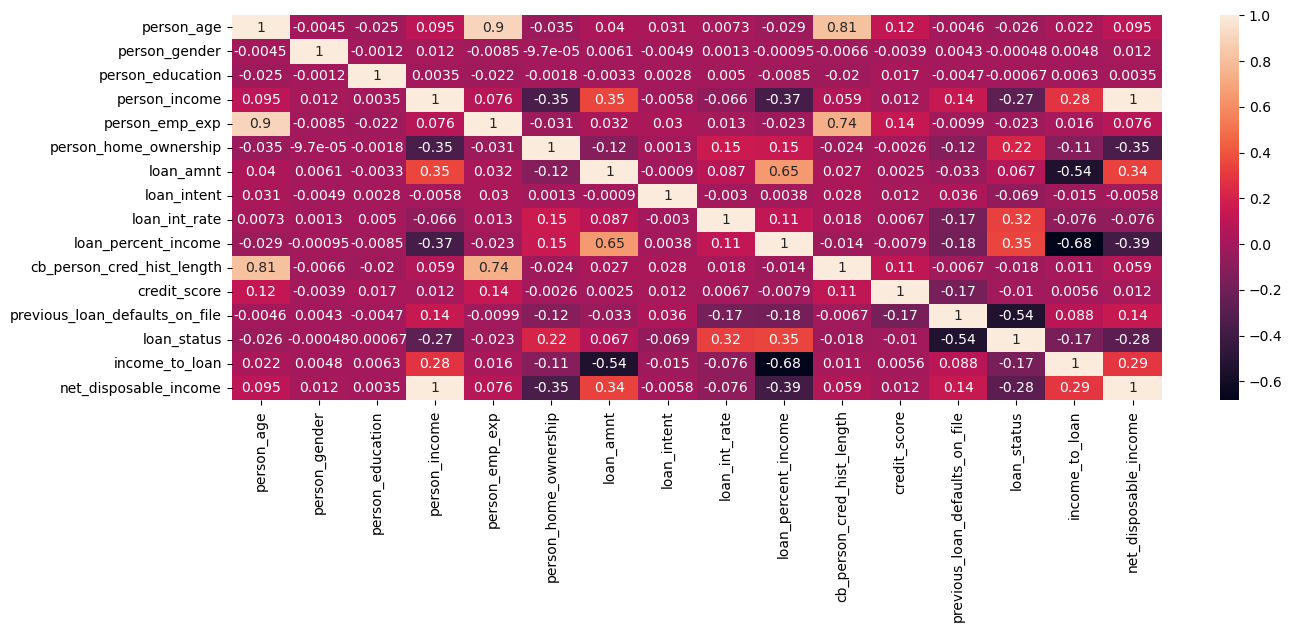

In [10]:
# heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)
plt.savefig('heatmap.png')
plt.show()

In [11]:
df.to_csv('data/processed_data.csv', index=False)